# Basics of Image analysis

This notebook demonstrates a few basic techniques to analyse and process images.
This includes:
- 

We start by importing the neccessary libraries in python

In [4]:
import matplotlib.pyplot as plt
import cv2 as cv
from skimage import filters
from skimage.io import imread
import urllib.request
import os

### Download necesary files from the internet
This downloads all the necessary files if the notebooks is being run on a google colab. If this notebook runs after being downloaded from github the data files are already included and will not be downloaded.

Image.tif already exists


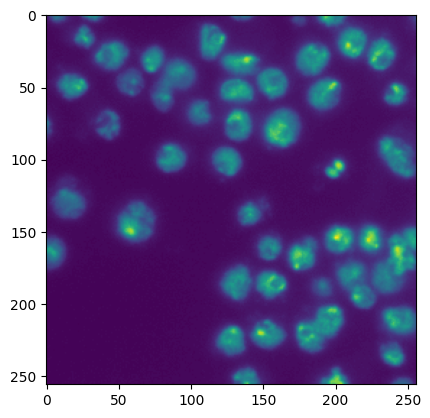

In [5]:
# import tif image
if not os.path.exists("data/0bf4b1.tif"):
  urllib.request.urlretrieve("https://moritzgmarquardt.de/202503_ibec_ml_workshop/0bf4b1.tif", "data/0bf4b1.tif")
  print("Downloaded 0bf4b1.tif")
else:
  print("Image.tif already exists")
img = imread("data/0bf4b1.tif")
plt.imshow(img)
plt.show()

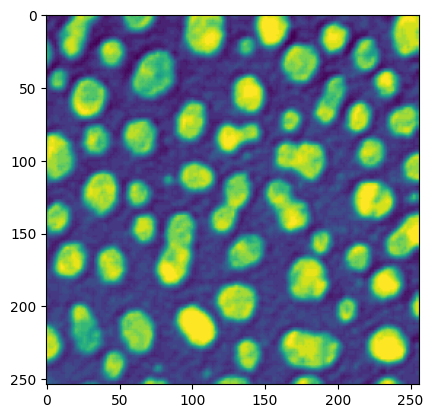

In [6]:
blobs = imread("data/blobs.tif")
plt.imshow(blobs)

Text(0.5, 1.0, 'Gaussian Filter')

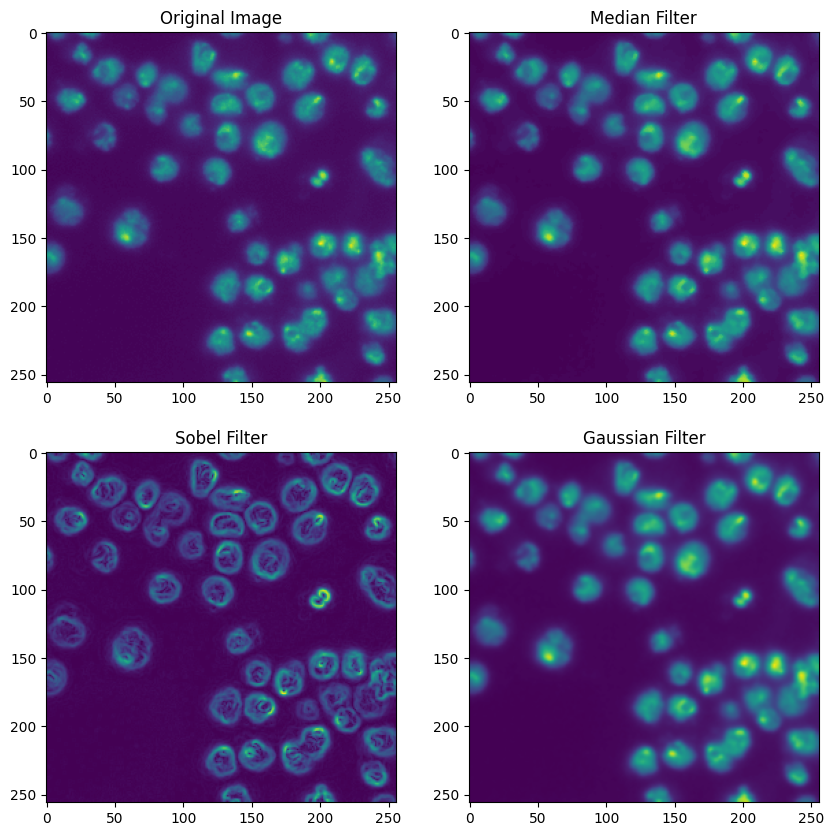

In [19]:
fix, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(filters.median(img))
ax[1].set_title('Median Filter')
ax[2].imshow(filters.sobel(img))
ax[2].set_title('Sobel Filter')
ax[3].imshow(filters.gaussian(img))
ax[3].set_title('Gaussian Filter')

### Image denoising / restauration
We will do this using total variation denoising to preserve edges.

Text(0.5, 1.0, 'Denoised Image (cropped)')

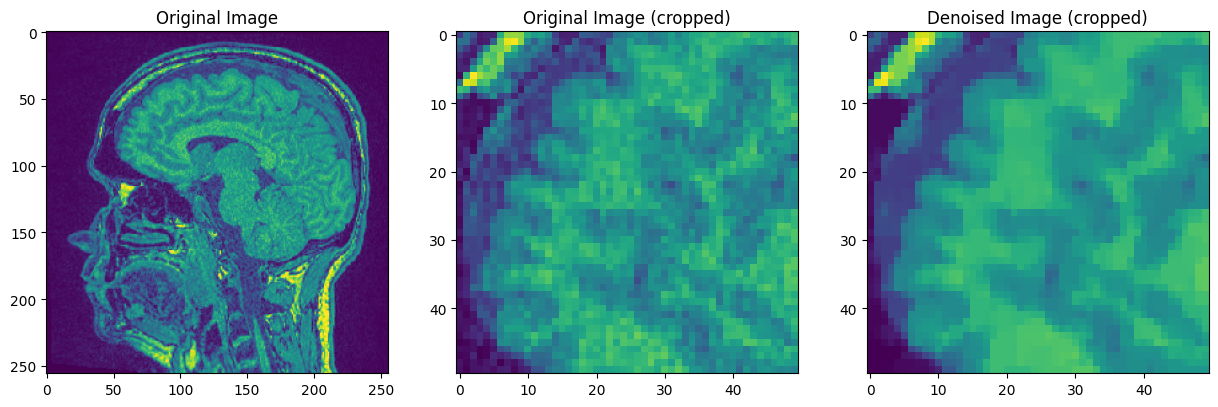

In [56]:
from skimage.restoration import denoise_tv_chambolle
mrt_img_original = imread("data/Haase_MRT_tfl3d1.tif")[90]
mrt_img = mrt_img_original[50:100, 50:100]
denoised_img = denoise_tv_chambolle(mrt_img, weight=0.03, eps=0.00001, max_num_iter=2000, )
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = ax.ravel()
ax[0].imshow(mrt_img_original)
ax[0].set_title('Original Image')
ax[1].imshow(mrt_img)
ax[1].set_title('Original Image (cropped)')
ax[2].imshow(denoised_img)
ax[2].set_title('Denoised Image (cropped)')

Other Filter techniques

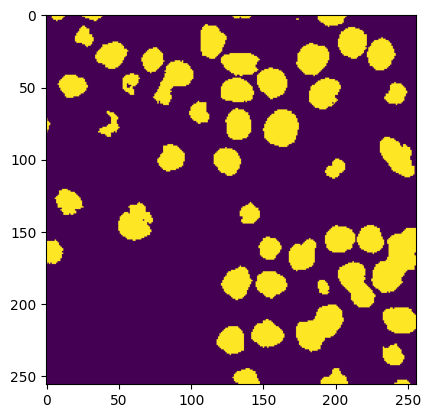

In [59]:
otsu = filters.threshold_otsu(img)
plt.imshow(img > otsu)

## split touching objects
(noteboook available in the collection of notebooks)

In [ ]:
from napari_segment_blobs_and_things_with_membranes import threshold_otsu, split_touching_objects
from skimage.io import imread
from skimage import data
from pyclesperanto_prototype import imshow

blobs = imread('../../data/blobs.tif')

binary = threshold_otsu(blobs)

imshow(binary)

split_objects = split_touching_objects(binary)
imshow(split_objects)

## Further exercises
If you finished all the above faster, you can try to do these exercises